In [1]:
import pandas as pd

In [2]:
weather = pd.read_parquet("../data/raw/weather_large.parquet")
production = pd.read_parquet("../data/raw/production_large.parquet")
ege_farms = pd.read_csv("../data/meta/ege_farms.csv")
df = pd.read_parquet("../data/processed/outlier_removed.parquet")


In [3]:
print(df.forecast_dt.min())
print(df.forecast_dt.max())

2019-01-24 03:00:00
2022-01-27 23:00:00


In [29]:
df[(df["rt_plant_id"] == 2050) & (df["forecast_dt"] == "2019-01-24 03:00:00")].head()

,forecast_dt,rt_plant_id,production_old,UGRD_80.m.above.ground.SW,UGRD_80.m.above.ground.NW,UGRD_80.m.above.ground.NE,UGRD_80.m.above.ground.SE,VGRD_80.m.above.ground.SW,VGRD_80.m.above.ground.NW,VGRD_80.m.above.ground.NE,VGRD_80.m.above.ground.SE,production_lower,production_upper,is_outlier,production
1794996,2019-01-24 03:00:00,2050,10.8,-5.69199,-5.30199,-4.90199,-4.01199,12.0692,9.84919,5.61919,4.81919,0.0,10.8,False,10.8


In [30]:
a = weather[weather["forecast_dt"] == "2019-01-24 03:00:00"]
a[(a["lon"].isin([27., 27.25])) & (a["lat"].isin([38.25, 38.5]))] 

,forecast_epoch,lat,lon,UGRD_80.m.above.ground,VGRD_80.m.above.ground,forecast_dt
3794006,1548288000,38.25,27.25,-4.90199,5.61919,2019-01-24 03:00:00+03:00
6249975,1548288000,38.50,27.25,-4.01199,4.81919,2019-01-24 03:00:00+03:00
6946060,1548288000,38.25,27.00,-5.69199,12.06920,2019-01-24 03:00:00+03:00
7548651,1548288000,38.50,27.00,-5.30199,9.84919,2019-01-24 03:00:00+03:00


In [31]:
ege_farms[ege_farms["subProvince"] == "Konak"]

,FacilityId,eic,province,subProvince,lon,lat,name,rt_plant_id
66,6064,40W000000010013S,Izmir,Konak,27.130678,38.384474,GERMİYAN RES,2050


In [19]:
plot_df = pd.DataFrame([
    [27, 38.25, "green"], 
    [27, 38.5, "green"], 
    [27.25, 38.25, "green"], 
    [27.25, 38.5, "green"], 
    [27.1, 38.41, "red"]
    ], columns=["lon", "lat", "color"])

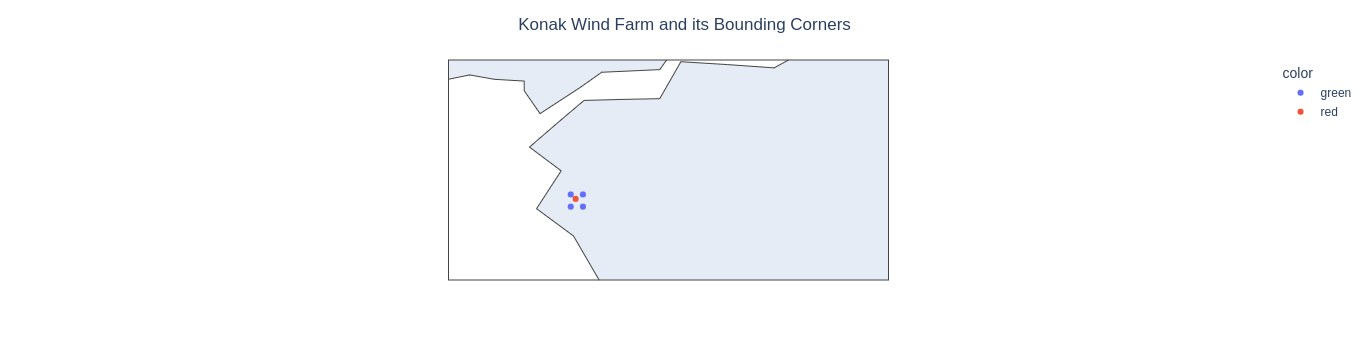

In [77]:
import plotly.express as px

fig = px.scatter_geo(plot_df, lat='lat', lon='lon', color='color') #, text="subProvince")
fig.update_layout(
    title = 'Konak Wind Farm and its Bounding Corners', 
    title_x=0.5, 
    geo=dict(projection_scale=40, center=dict(lat=36+3, lon=26+3)),
)
fig.show()